# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_04_001
## Лінійна фільтрація. Усередняючий фільтр 

In [2]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

##  Чорний квадрат

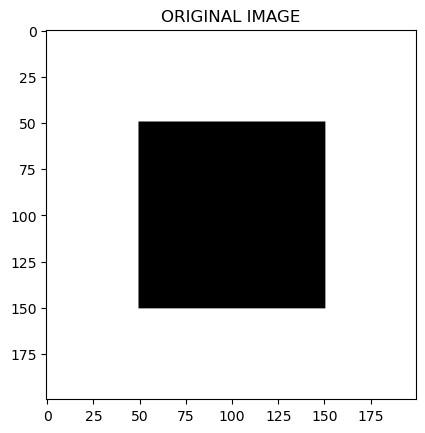

In [3]:
rows_num = 200 ## кількість рядків
clms_num = 200 ## кількість колонок
test_im = np.full ((rows_num, clms_num, 3), (255, 255, 255) , dtype=np.uint16)
## 
xU =  50  ; yL =  50
xD =  150 ; yR = 150
for i in  range (xU, xD+1, 1):
    for j in  range (yL, yR+1, 1):
        test_im [i, j, : ] = [0, 0, 0]

plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

#### Параметри маски

In [5]:
L = 1; mask_row = 3; mask_clm = 3
Div = 9
print ('L=K=',L, 'D = ',Div)

L=K= 1 D =  9


#### Размиівання по повному вікну

In [18]:
# Визначення перетвореного зображення
filtr_im_ = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint16)

for i in  range (0, (rows_num-L*2), 1):
    for j in  range (0, (clms_num-L*2), 1):
        for k in range (-L, L+1, 1):
            for l in range (-L, L+1, 1): 
                filtr_im_[i,j]  += test_im[i+k,j+l] # РАЗМЫВАНИЕ ПО ПОЛНОМУ ОКНУ
        filtr_im_[i,j]  = filtr_im_[i,j] / 9

i = 50 ; j = 50   
print ('I=',i,'J =', j, test_im[i,j, 0], filtr_im_[i,j, 0] )  

I= 50 J = 50 0 141


#### Відображення оригінального та філтрованого зображеннь

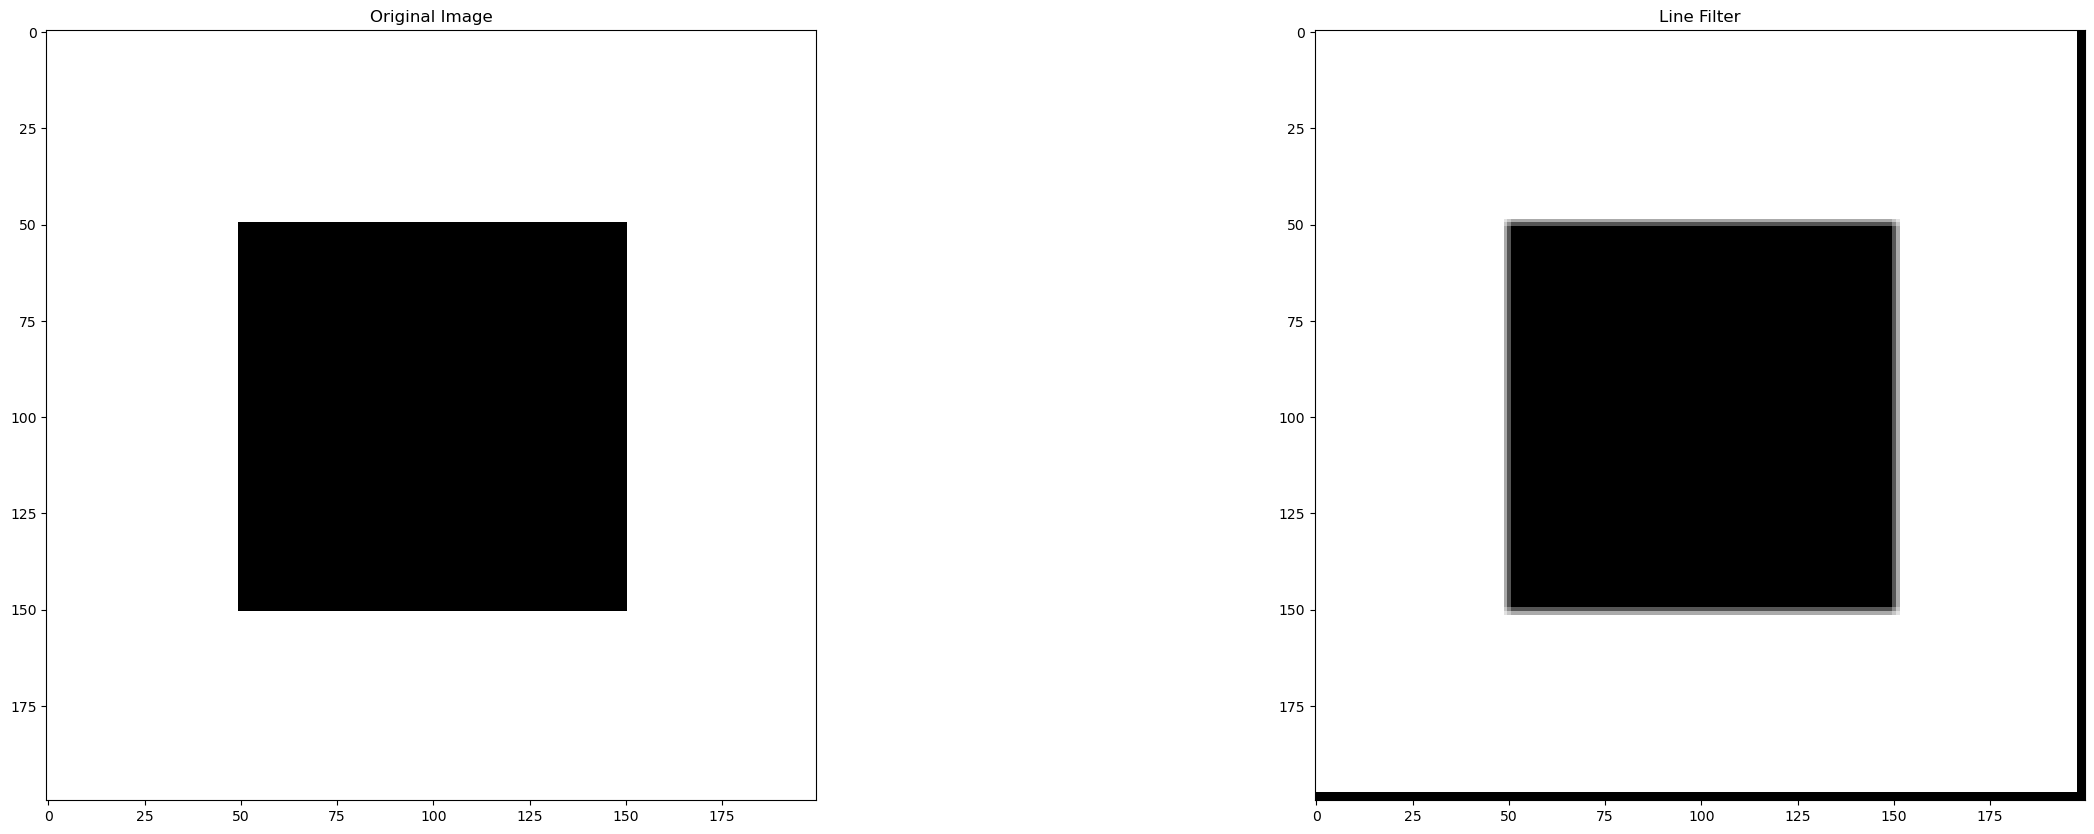

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_)
ax[1].set_title("Line Filter")
plt.show()

In [20]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Im_04_01.png'
test_im = io.imread(path + filename)
test_im_ = np.uint32(test_im) 
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (200, 512, 3) IMAGE SIZE 307200
ROWS NUMBER 200 CLMS NUMBER 512 PIX NUMBER 102400 Bins 256


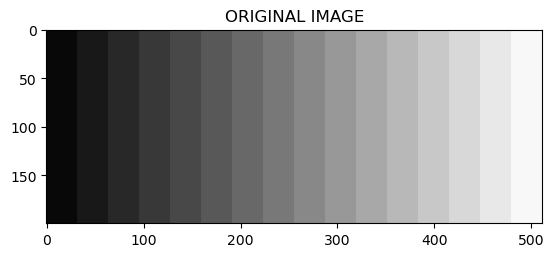

In [21]:
## Вивід оррігінального зображення  та зображення з шумом 
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

##  Найпростіший усередняючий лінійний оператор

L=K= 2 D =  25


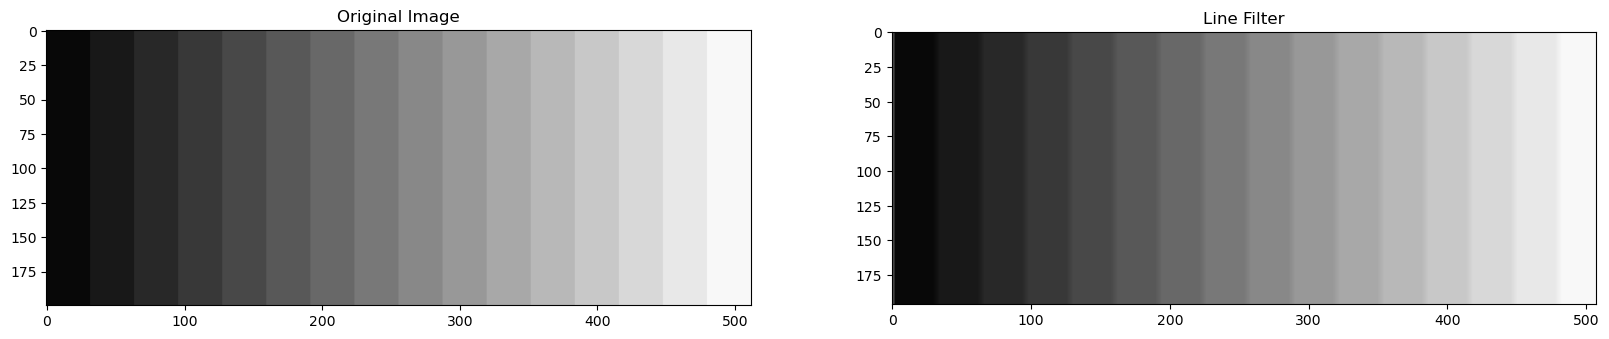

In [24]:
## Визначення параметрів маски
L = 2; mask_row = L*2+1 ; mask_clm = L*2+1
Div = (2*L+1)*(2*L+1)
print ('L=K=',L, 'D = ',Div)

## Визначення файлу перетвореного зображення

filtr_im_ = np.zeros ( (rows_num-L*2, clms_num-L*2, 3), dtype=np.uint32)

# Розмивання по повному вікну
for i in  range (0, (rows_num-L*2), 1):
    for j in  range (0, (clms_num-L*2), 1):
        for k in range (-L, L+1, 1):
            for l in range (-L, L+1, 1):
                filtr_im_[i,j]  += test_im_[i+k,j+l] # розмивання

filtr_im_[:,:,:] = filtr_im_[:,:,:] / Div
        
## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_)
ax[1].set_title("Line Filter")
plt.show()

## Найпростіший усередняючий лінійний оператор (ЛЕНА)
## Фільтрація цифрового зображення

In [26]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im_lena = io.imread(path + filename)
test_im_lena = np.uint32(test_im_lena) 
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im_lena.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im_lena.shape[0] ## кількість рядків
clms_num = test_im_lena.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

## Додаємо СІЛЬ
test_im_lena [50,50,:] = [255,255,255] 
test_im_lena [51,50,:] = [255,255,255] 
test_im_lena [50,51,:] = [255,255,255] 
test_im_lena [51,51,:] = [255,255,255] 

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 307200
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


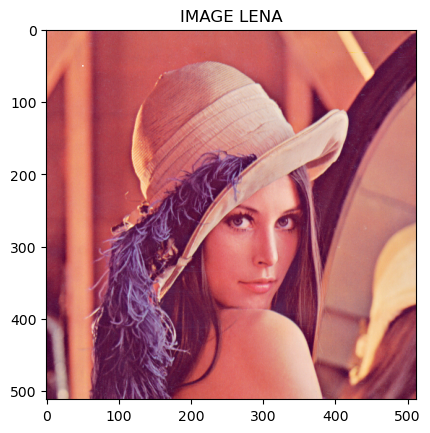

In [27]:
## Вивід оррігінального зображення на екран
plt.title('IMAGE LENA')
plt.imshow(test_im_lena)
plt.show()

L=K= 2 D =  25


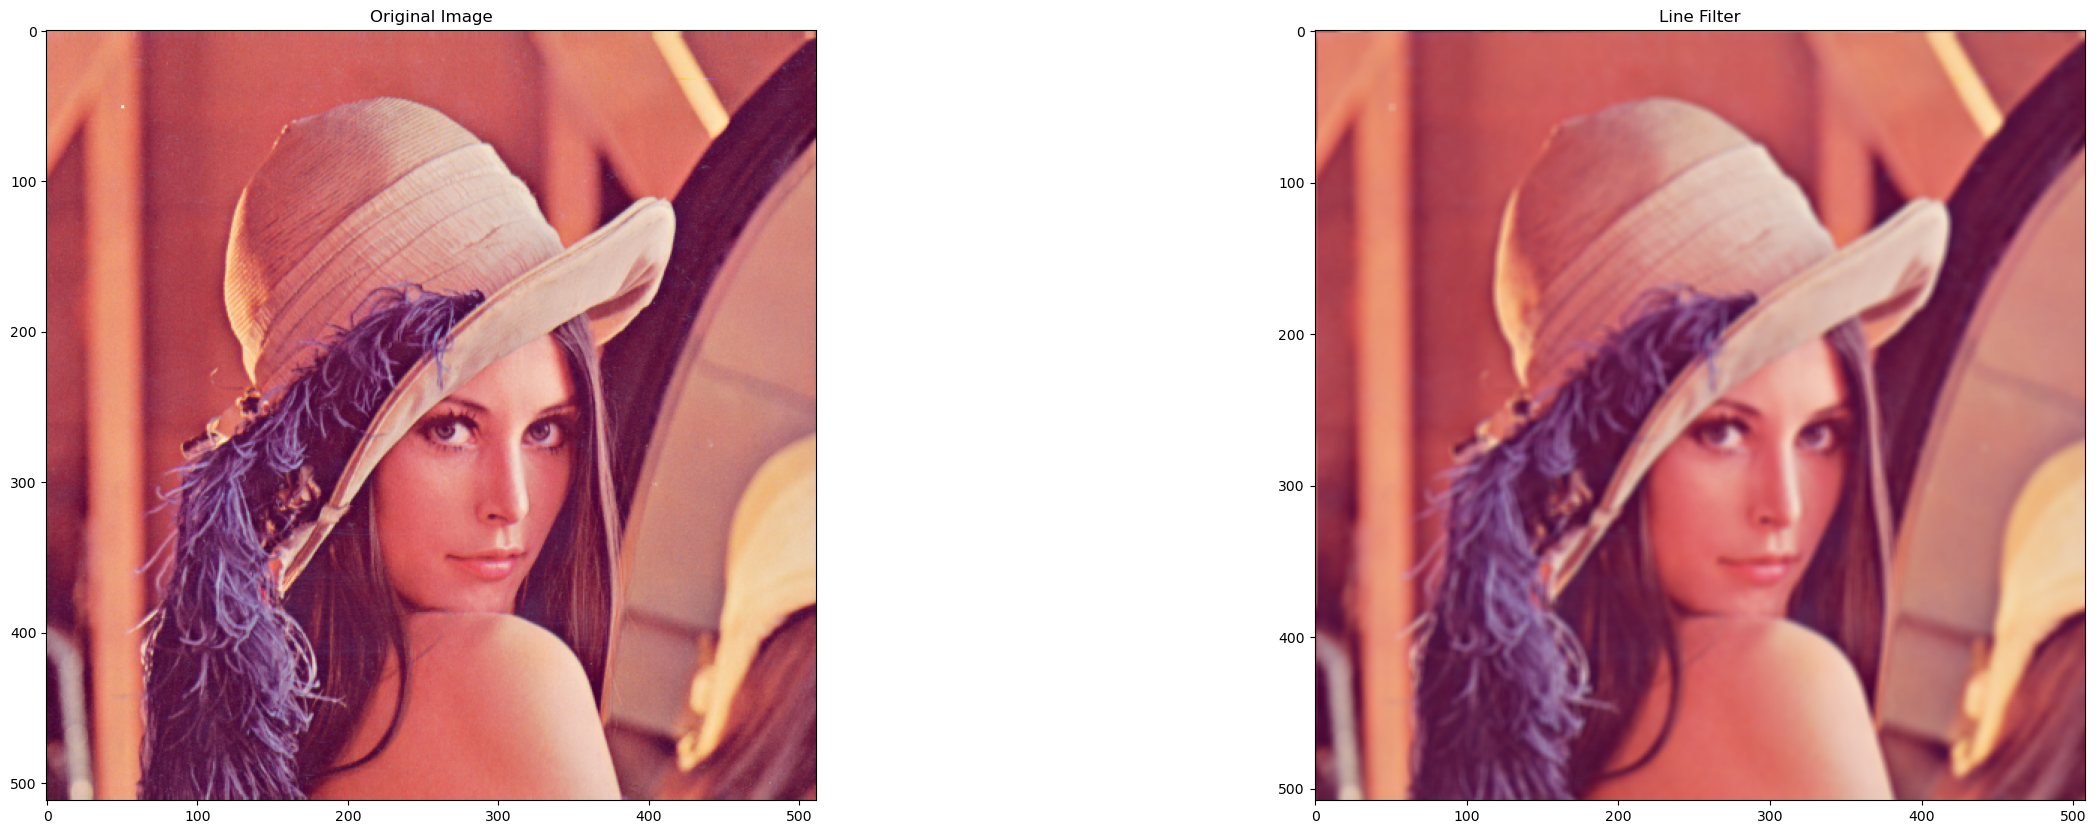

In [28]:
## Визначення параметрів маски
L = 2; mask_row = L*2+1 ; mask_clm = L*2+1
Div = (2*L+1)*(2*L+1)
print ('L=K=',L, 'D = ',Div)

## Визначення файлу перетвореного зображення

filtr_im_lena = np.zeros ( (rows_num-L*2, clms_num-L*2, 3), dtype=np.uint32)

# РАЗМЫВАНИЕ ПО ПОЛНОМУ ОКНУ
for i in  range (0, (rows_num-L*2), 1):
    for j in  range (0, (clms_num-L*2), 1):
        for k in range (-L, L+1, 1):
            for l in range (-L, L+1, 1):
                filtr_im_lena[i,j]  += test_im_lena[i+k,j+l] # РАЗМЫВАНИЕ ПО ПОЛНОМУ ОКНУ

filtr_im_lena[:,:,:] = filtr_im_lena[:,:,:] / Div
        
## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(test_im_lena)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_lena)
ax[1].set_title("Line Filter")
plt.show()